In [9]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt



import os
for dirname, _, filenames in os.walk(r'C:\Users\mbsav\Documents\data\inputs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\mbsav\Documents\data\inputs\직업 코드 번역.xlsx
C:\Users\mbsav\Documents\data\inputs\한국 소득 복지.csv


In [5]:
wf = pd.read_csv(r'C:\Users\mbsav\Documents\data\inputs\한국 소득 복지.csv')

In [11]:
import pandas as pd

In [13]:
wf.isna().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

In [14]:
wf.describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,9.285700e+04,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000
mean,4.365181e+07,2011.517958,7.517958,3.691353,3441.122327,2.484304,1.296316,1952.956740,4.511895,1.679389,1.499521
std,2.619007e+07,4.011222,4.011222,2.058961,4176.324522,1.292251,0.456634,16.006065,1.669887,1.103413,0.531572
min,1.010100e+04,2005.000000,1.000000,1.000000,-232174.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000
25%,2.177120e+07,2008.000000,4.000000,2.000000,1140.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000
50%,4.322010e+07,2012.000000,8.000000,3.000000,2428.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000
75%,6.190030e+07,2015.000000,11.000000,5.000000,4695.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000
max,9.800070e+07,2018.000000,14.000000,7.000000,468209.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000


In [15]:
wf.nunique()

id                    10046
year                     14
wave                     14
region                    7
income                13306
family_member             9
gender                    2
year_born                90
education_level           8
marriage                  8
religion                  3
occupation              244
company_size             13
reason_none_worker       14
dtype: int64

In [16]:
wf.marriage.unique()

array([2, 1, 3, 5, 4, 6, 9, 0], dtype=int64)

In [18]:
wf = wf[wf['marriage'].between(1, 8)]
wf.marriage.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [19]:
wf.reason_none_worker.unique()

array(['8', '10', '1', ' ', '6', '9', '4', '3', '7', '5', '11', '99', '2',
       '0'], dtype=object)

In [20]:

wf[(wf['occupation'] == ' ')].value_counts('reason_none_worker')

reason_none_worker
10    19090
8      4268
9      2686
1      2499
       1493
7      1118
6      1074
4       704
5       326
11      237
99       76
3        49
2         7
0         1
Name: count, dtype: int64

In [21]:
wf = wf[wf['reason_none_worker'] != '99']
wf = wf[wf['reason_none_worker'] != '0']

In [22]:
wf['check'] = wf.occupation.apply([lambda x: True if x == ' ' else False])
wf['check2'] = wf.reason_none_worker.apply([lambda x: True if x == ' ' else False])
indexNames = wf[(wf['check'] == True) & (wf['check2'] == True)].index
print(indexNames)

Index([   32,    93,   107,   126,   127,   128,   129,   130,   131,   132,
       ...
       91979, 92176, 92177, 92181, 92307, 92535, 92556, 92689, 92745, 92788],
      dtype='int64', length=1493)


In [23]:
wf.drop(indexNames , inplace=True)
wf = wf.drop(['check'], axis=1)
wf = wf.drop(['check2'], axis=1)

In [26]:
wf.loc[wf['marriage'] == 1, 'marriage'] = 'NA(Under_18)'
wf.loc[wf['marriage'] == 2, 'marriage'] = 'married'
wf.loc[wf['marriage'] == 3, 'marriage'] = 'separated_by_death'
wf.loc[wf['marriage'] == 4, 'marriage'] = 'separated'
wf.loc[wf['marriage'] == 5, 'marriage'] = 'not_married_yet'
wf.loc[wf['marriage'] == 6, 'marriage'] = 'others'
wf.loc[wf['education_level'] == 1, 'education_level'] = 'no_education(under_7)'
wf.loc[wf['education_level'] == 2, 'education_level'] = 'no_education'
wf.loc[wf['education_level'] == 3, 'education_level'] = 'elementary'
wf.loc[wf['education_level'] == 4, 'education_level'] = 'middle_school'
wf.loc[wf['education_level'] == 5, 'education_level'] = 'high_school'
wf.loc[wf['education_level'] == 6, 'education_level'] = 'college'
wf.loc[wf['education_level'] == 7, 'education_level'] = 'university_degree'
wf.loc[wf['education_level'] == 8, 'education_level'] = 'MA'
wf.loc[wf['education_level'] == 9, 'education_level'] = 'doctoral_degree'
wf.loc[wf['region'] == 1, 'region'] = 'Seoul'
wf.loc[wf['region'] == 2, 'region'] = 'Kyeong-gi'
wf.loc[wf['region'] == 3, 'region'] = 'Kyoung-nam'
wf.loc[wf['region'] == 4, 'region'] = 'Kyong-buk'
wf.loc[wf['region'] == 5, 'region'] = 'Chong-nam'
wf.loc[wf['region'] == 6, 'region'] = 'Gang-won & Chung-buk'
wf.loc[wf['region'] == 7, 'region'] = 'Jeju'
wf.loc[wf['reason_none_worker'] == '1', 'reason_none_worker'] = 'not_capable'
wf.loc[wf['reason_none_worker'] == '2', 'reason_none_worker'] = 'in_military_service'
wf.loc[wf['reason_none_worker'] == '3', 'reason_none_worker'] = 'studying_in_school'
wf.loc[wf['reason_none_worker'] == '4', 'reason_none_worker'] = 'prepare_for_school'
wf.loc[wf['reason_none_worker'] == '5', 'reason_none_worker'] = 'prepare_to_apply_job'
wf.loc[wf['reason_none_worker'] == '6', 'reason_none_worker'] = 'house_worker'
wf.loc[wf['reason_none_worker'] == '7', 'reason_none_worker'] = 'caring_for_kids_at_home'
wf.loc[wf['reason_none_worker'] == '8', 'reason_none_worker'] = 'nursing'
wf.loc[wf['reason_none_worker'] == '9', 'reason_none_worker'] = 'giving_up_economic_activities'
wf.loc[wf['reason_none_worker'] == '10', 'reason_none_worker'] = 'no_intention_to_work'
wf.loc[wf['reason_none_worker'] == '11', 'reason_none_worker'] = 'other'
wf.loc[wf['reason_none_worker'] == ' ', 'reason_none_worker'] = 'employed'
wf.loc[wf['gender'] == 1, 'gender'] = 'male'
wf.loc[wf['gender'] == 2, 'gender'] = 'female'
wf.loc[wf['religion'] == 1, 'religion'] = 'religious'
wf.loc[wf['religion'] == 2, 'religion'] = 'non-religious'
wf.loc[wf['occupation'] == ' ', 'occupation'] = 20000

wf = wf.astype({'occupation': 'int64'})
# wf = wf.merge(job_check, on='occupation', how='left')

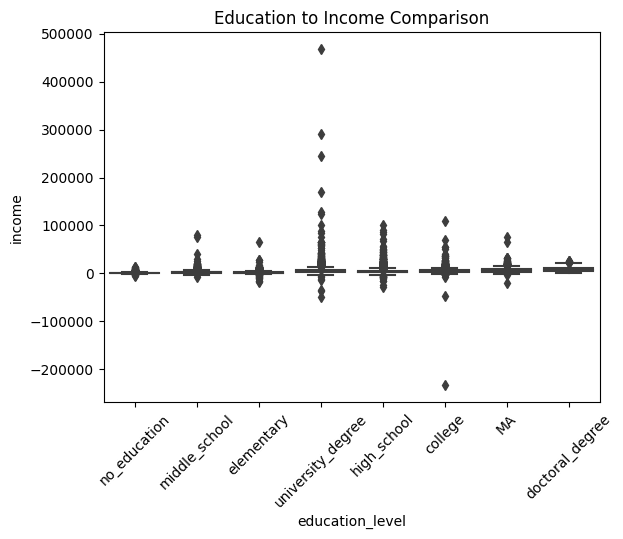

In [27]:
plt.figure()
sns.boxplot(data=wf, x='education_level', y='income')
plt.title('Education to Income Comparison')
plt.xticks(rotation=45)
plt.show()

In [28]:
wf.income.quantile([.002, .998])

0.002      -47.00
0.998    24484.16
Name: income, dtype: float64

In [29]:
wf = wf[(wf['income'] <= 25000) & (wf['income'] >= 0)]

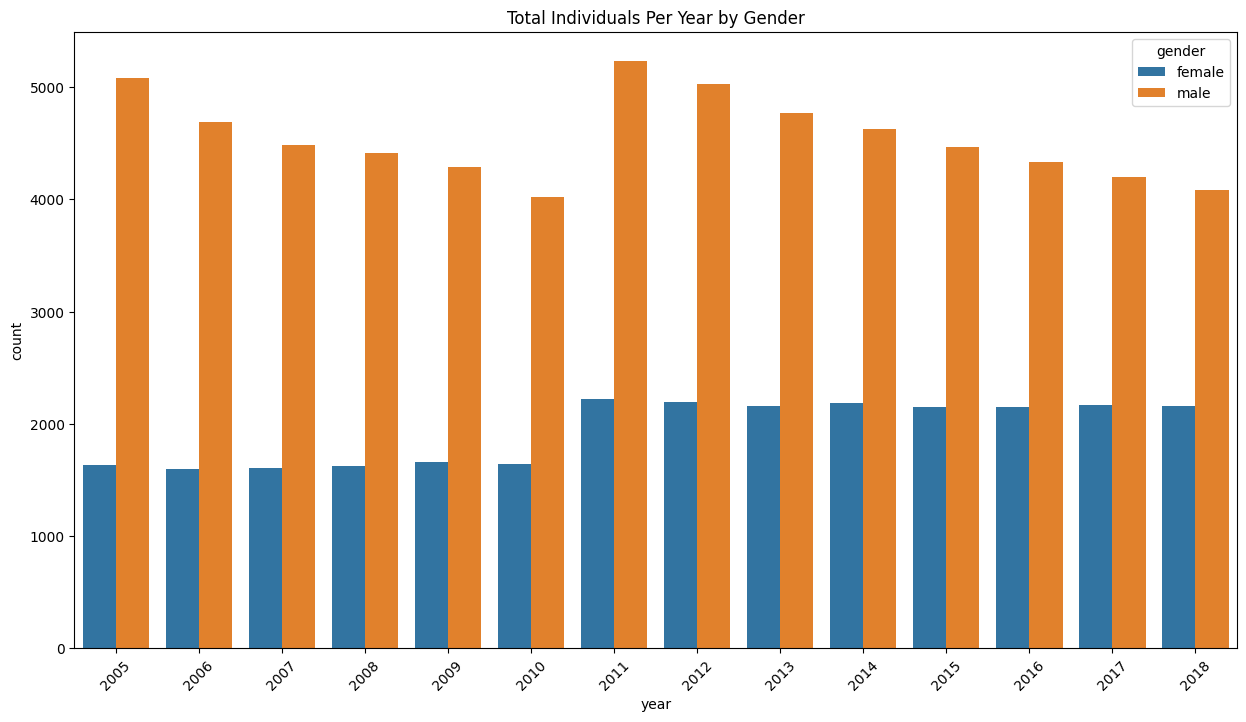

In [30]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, x='year', hue='gender')
plt.title('Total Individuals Per Year by Gender')
plt.xticks(rotation=45)
plt.show()

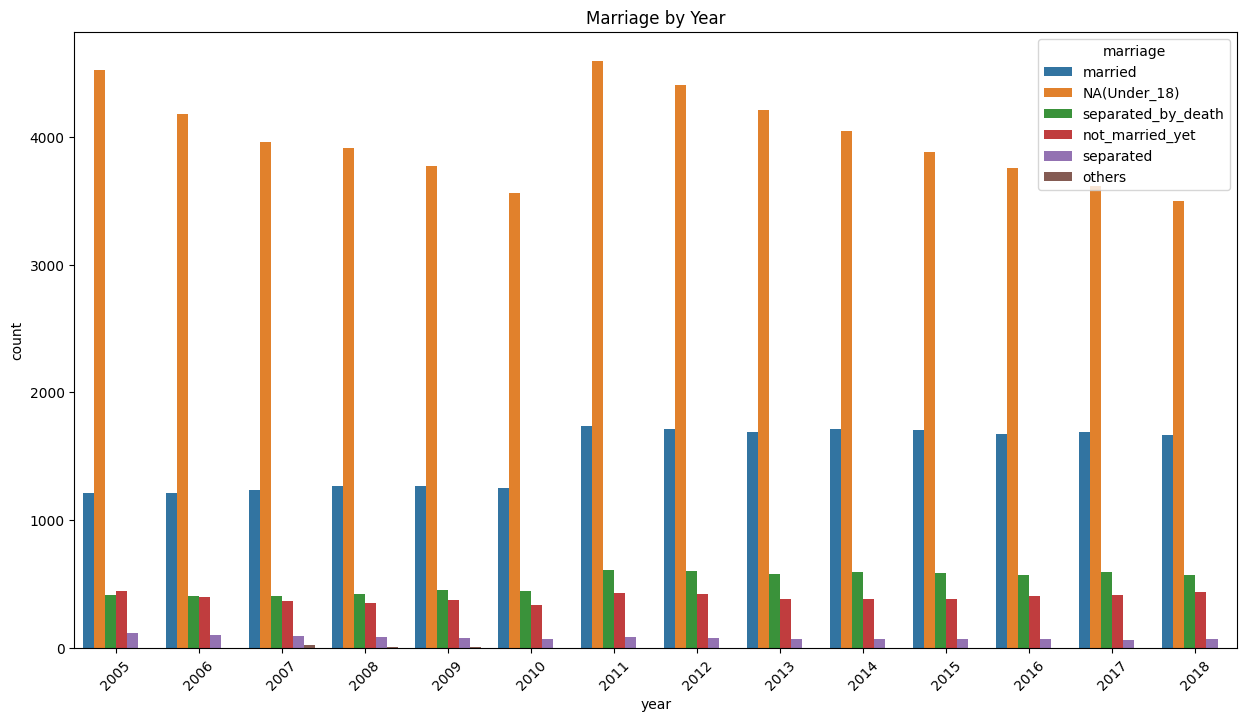

In [31]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, x='year', hue='marriage')
plt.title('Marriage by Year')
plt.xticks(rotation=45)
plt.show()

In [34]:
wf['age'] = [y-z for y, z in zip(wf['year'], wf['year_born'])]

In [35]:
wf=wf.drop('year_born', axis=1)

C:\Users\mbsav\AppData\Local\Temp\ipykernel_12024\1353537446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0["age"], kde=False, bins = 20)
C:\Users\mbsav\AppData\Local\Temp\ipykernel_12024\1353537446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1["age"], kde=False, bin

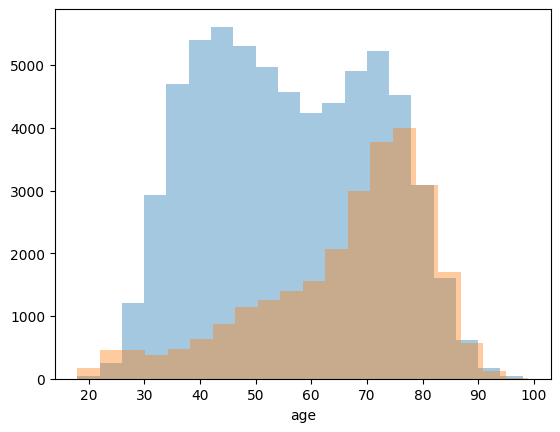

In [36]:
target_0 = wf.loc[wf['gender'] == 'male']
target_1 = wf.loc[wf['gender'] == 'female']

sns.distplot(target_0["age"], kde=False, bins = 20)
sns.distplot(target_1["age"], kde=False, bins = 20)
plt.show()

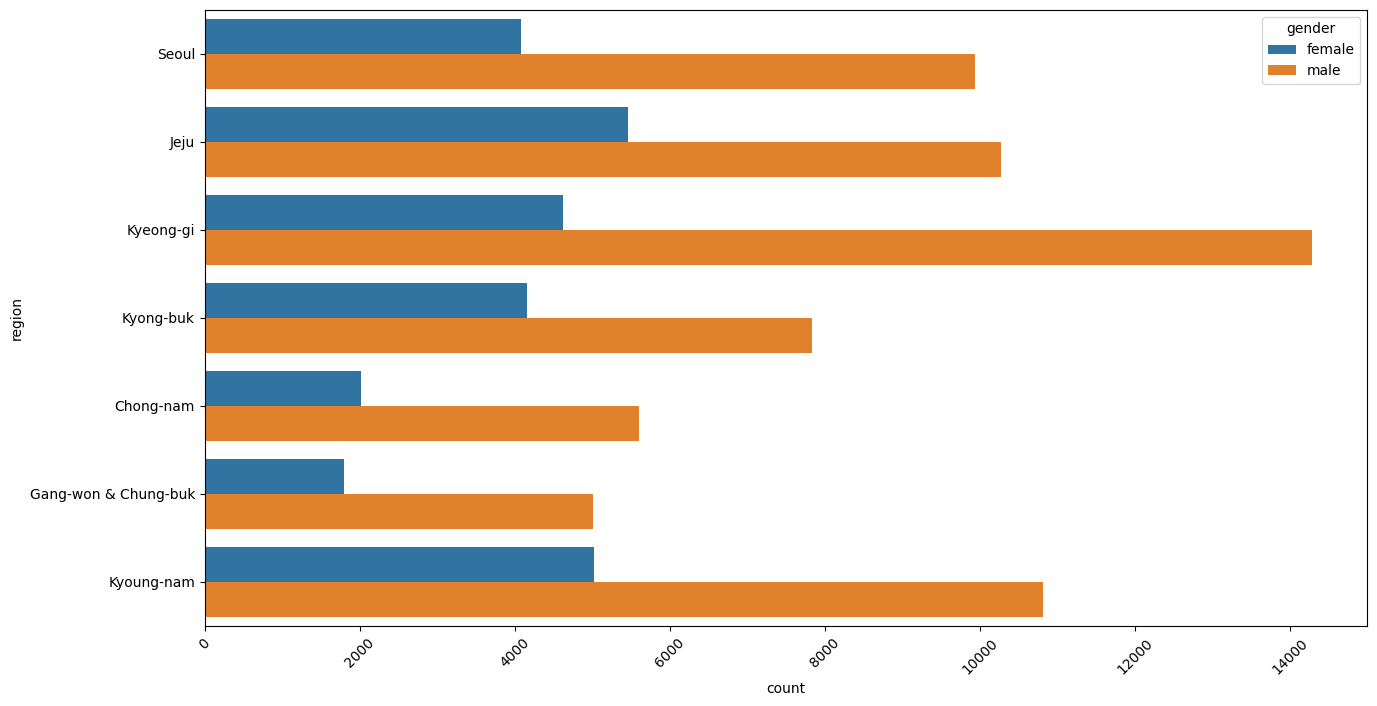

In [37]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, y='region', hue='gender')
plt.xticks(rotation=45)
plt.show()

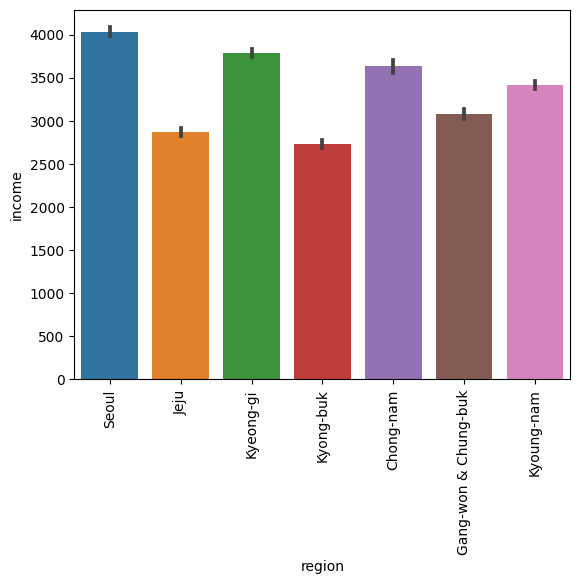

In [38]:
plt.figure()
sns.barplot(data=wf, x='region', y='income')
plt.xticks(rotation=90)
plt.show()

In [41]:
from sklearn import preprocessing

x = np.array(wf['age']) #returns a numpy array
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['age'] = x_scaled

In [42]:
x = np.array(wf['income']) #returns a numpy array
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['income'] = x_scaled

In [43]:
wf.loc[wf['company_size'] == ' ', 'company_size'] = None


In [44]:
x = np.array(wf['company_size']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['company_size'] = x_scaled

In [45]:
x = np.array(wf['family_member']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['family_member'] = x_scaled
x = np.array(wf['year']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['year'] = x_scaled

In [46]:
df=wf[['region', 'income', 'age', 'year','family_member', 'gender', 'education_level', 'marriage', 'religion', 'reason_none_worker']]

In [47]:
for col in df.columns[5:]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [49]:
from sklearn.model_selection import train_test_split
target = df.iloc[:, 0:1].values.ravel()
data = df.iloc[:,1:len(df.columns)]

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=5)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(x_train, y_train)
pre = model.predict(x_test)
model = DecisionTreeClassifier()
model_dec = model.fit(x_train, y_train)
pre_dec = model.predict(x_test)
neigh = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)
pre_kn = neigh.predict(x_test)

In [51]:
from sklearn.metrics import classification_report
print('Logistic Regression')
print(classification_report(y_test, pre))
print('Decision Tree')
print(classification_report(y_test, pre_dec))
print('KN Neighbors')
print(classification_report(y_test, pre_kn))

Logistic Regression


C:\Users\mbsav\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbsav\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbsav\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

                      precision    recall  f1-score   support

           Chong-nam       0.00      0.00      0.00      1518
Gang-won & Chung-buk       0.47      0.01      0.01      1327
                Jeju       0.26      0.31      0.29      3263
           Kyeong-gi       0.26      0.54      0.35      3749
           Kyong-buk       0.24      0.03      0.06      2354
          Kyoung-nam       0.24      0.30      0.27      3188
               Seoul       0.32      0.25      0.28      2781

            accuracy                           0.26     18180
           macro avg       0.26      0.21      0.18     18180
        weighted avg       0.26      0.26      0.22     18180

Decision Tree
                      precision    recall  f1-score   support

           Chong-nam       0.16      0.17      0.17      1518
Gang-won & Chung-buk       0.16      0.17      0.17      1327
                Jeju       0.27      0.26      0.26      3263
           Kyeong-gi       0.29      0.29      0.29 

In [52]:
from sklearn import metrics
acc = {}
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    pre_kn = neigh.predict(x_test)
    acc[i] = metrics.accuracy_score(y_test, pre_kn)
print(acc)

{1: 0.2393839383938394, 2: 0.23085808580858086, 3: 0.23256325632563257, 4: 0.24158415841584158, 5: 0.2462046204620462, 6: 0.2535203520352035, 7: 0.2577007700770077, 8: 0.25605060506050603, 9: 0.25995599559955995, 10: 0.2607260726072607, 11: 0.26116611661166117, 12: 0.263036303630363, 13: 0.26562156215621563, 14: 0.2635863586358636, 15: 0.2683718371837184, 16: 0.26732673267326734, 17: 0.2693069306930693, 18: 0.2693069306930693, 19: 0.2737623762376238}


In [53]:
import operator

max(acc, key=lambda key: acc[key])

19

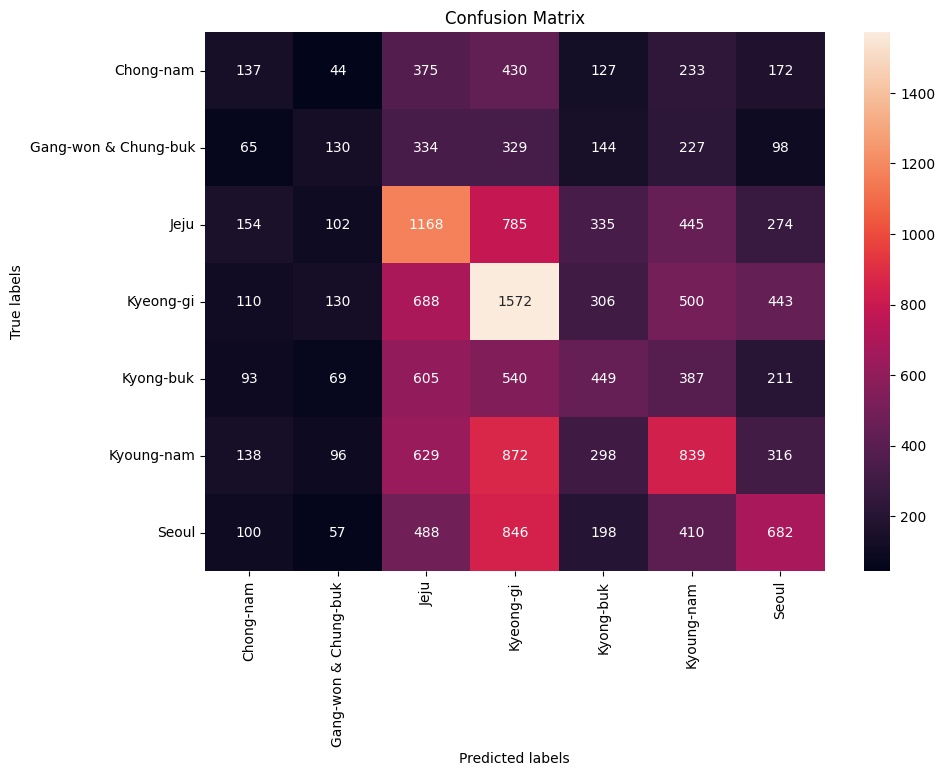

In [54]:
from sklearn.metrics import confusion_matrix 

final_cm = confusion_matrix(y_test, pre_kn)
knn_labels = neigh.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);